In [1]:
import os
import pandas as pd
os.environ["JAVA_HOME"] = "/scratch/sg7729/jdk8u292-b10/"
os.environ["SPARK_HOME"] = "/scratch/sg7729/spark-3.1.1-bin-hadoop3.2/"

In [2]:
import os

# Your directory path
directory_path = '/home/sg7729/.local/bin'

# Add the directory to the PATH environment variable
os.environ['PATH'] = f"{directory_path}:{os.environ['PATH']}"


In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

23/12/07 09:48:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [4]:

data_folder = '/scratch/sg7729/Big data Project/Bigdata/'
high_volume_filename = '/scratch/sg7729/Big data Project/Bigdata/high_volume.csv'
green_taxi_filename = '/scratch/sg7729/Big data Project/Bigdata/green_taxi.csv'
yellow_taxi_filename = '/scratch/sg7729/Big data Project/Bigdata/yellow_taxi.csv'

In [5]:
green_taxi_data = spark.read.csv(green_taxi_filename, header=True)
high_volume_data= spark.read.csv(high_volume_filename, header=True)
yellow_taxi_data = spark.read.csv(yellow_taxi_filename, header=True)

In [6]:

# Display the schema of each DataFrame
print("Green Taxi Data Schema:")
# Drop the _c0 column
green_taxi_data = green_taxi_data.drop("_c0")

# Show the updated schema
green_taxi_data.printSchema()

Green Taxi Data Schema:
root
 |-- VendorID: string (nullable = true)
 |-- lpep_pickup_datetime: string (nullable = true)
 |-- lpep_dropoff_datetime: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- RatecodeID: string (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: string (nullable = true)
 |-- fare_amount: string (nullable = true)
 |-- extra: string (nullable = true)
 |-- mta_tax: string (nullable = true)
 |-- tip_amount: string (nullable = true)
 |-- tolls_amount: string (nullable = true)
 |-- ehail_fee: string (nullable = true)
 |-- improvement_surcharge: string (nullable = true)
 |-- total_amount: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- trip_type: string (nullable = true)
 |-- congestion_surcharge: string (nullable = true)



In [7]:
print("\nYellow Taxi Data Schema:")
# Drop the _c0 column
yellow_taxi_data = yellow_taxi_data.drop("_c0")

# Show the updated schema
yellow_taxi_data.printSchema()


Yellow Taxi Data Schema:
root
 |-- VendorID: string (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: string (nullable = true)
 |-- RatecodeID: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: string (nullable = true)
 |-- extra: string (nullable = true)
 |-- mta_tax: string (nullable = true)
 |-- tip_amount: string (nullable = true)
 |-- tolls_amount: string (nullable = true)
 |-- improvement_surcharge: string (nullable = true)
 |-- total_amount: string (nullable = true)
 |-- congestion_surcharge: string (nullable = true)
 |-- Airport_fee: string (nullable = true)



In [8]:
print("\nHigh Volume Data Schema:")
# Drop the _c0 column
high_volume_data = high_volume_data.drop("_c0")

# Show the updated schema
high_volume_data.printSchema()


High Volume Data Schema:
root
 |-- hvfhs_license_num: string (nullable = true)
 |-- dispatching_base_num: string (nullable = true)
 |-- originating_base_num: string (nullable = true)
 |-- request_datetime: string (nullable = true)
 |-- on_scene_datetime: string (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)
 |-- trip_miles: string (nullable = true)
 |-- trip_time: string (nullable = true)
 |-- base_passenger_fare: string (nullable = true)
 |-- tolls: string (nullable = true)
 |-- bcf: string (nullable = true)
 |-- sales_tax: string (nullable = true)
 |-- congestion_surcharge: string (nullable = true)
 |-- airport_fee: string (nullable = true)
 |-- tips: string (nullable = true)
 |-- driver_pay: string (nullable = true)
 |-- shared_request_flag: string (nullable = true)
 |-- shared_match_flag: string (nullable = true)
 |-- access_a_ri

In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, hour,dayofmonth
from pyspark.sql.types import TimestampType

In [10]:
# Convert datetime columns to timestamp
green_taxi_data = green_taxi_data.withColumn("pickup_datetime", col("lpep_pickup_datetime").cast(TimestampType()))
yellow_taxi_data = yellow_taxi_data.withColumn("pickup_datetime", col("tpep_pickup_datetime").cast(TimestampType()))
high_volume_data = high_volume_data.withColumn("pickup_datetime", col("pickup_datetime").cast(TimestampType()))

# Feature engineering - Extract hour of the day
green_taxi_data = green_taxi_data.withColumn("hour_of_day", hour(col("pickup_datetime")))
yellow_taxi_data = yellow_taxi_data.withColumn("hour_of_day", hour(col("pickup_datetime")))
high_volume_data = high_volume_data.withColumn("hour_of_day", hour(col("pickup_datetime")))

# Feature engineering - Extract day of the month
green_taxi_data = green_taxi_data.withColumn("day_of_the_month", dayofmonth(col("pickup_datetime")))
yellow_taxi_data = yellow_taxi_data.withColumn("day_of_the_month", dayofmonth(col("pickup_datetime")))
high_volume_data = high_volume_data.withColumn("day_of_the_month", dayofmonth(col("pickup_datetime")))


In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, when, round
from pyspark.sql.types import FloatType

# Create Spark session
spark = SparkSession.builder.appName("FeatureEngineering").getOrCreate()

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual DataFrame name

# Task 1: Drop specified columns
columns_to_drop = ['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag',
                   'RatecodeID', 'passenger_count', 'fare_amount',
                   'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
                   'payment_type', 'trip_type', 'pickup_datetime']

# df = green_taxi_data.drop(*columns_to_drop)
df = green_taxi_data

# Task 2: Convert and create a new column 'total_fare'
df = df.withColumn('total_amount', col('total_amount').cast(FloatType())) \
       .withColumn('congestion_surcharge', when(col('congestion_surcharge').cast(FloatType()).isNotNull(),
                                                 col('congestion_surcharge').cast(FloatType())).otherwise(0.0)) \
       .withColumn('total_fare', round(col('total_amount') + col('congestion_surcharge'), 2)) \
       .drop('total_amount', 'congestion_surcharge')

green_taxi_cleaned_data = df

In [17]:

green_taxi_cleaned_data = green_taxi_cleaned_data.select("hour_of_day", "day_of_the_month", "total_fare", "trip_distance", "PULocationID", "DOLocationID")

green_taxi_cleaned_data = green_taxi_cleaned_data.dropDuplicates(["hour_of_day", "day_of_the_month", "total_fare", "trip_distance", "PULocationID", "DOLocationID"])

hour_of_day,day_of_the_month,total_fare,trip_distance,PULocationID,DOLocationID
1,1,28.94,2.87,74,238
8,1,8.7,1.07,166,238
8,1,19.9,3.52,75,69
13,1,31.44,4.2,74,243
14,1,24.0,2.93,43,142
14,1,20.0,0.0,10,216
15,1,10.8,1.2,61,61
16,1,14.7,0.91,166,41
17,1,29.98,2.04,75,237
18,1,12.6,1.2,75,74


In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, when, round
from pyspark.sql.types import FloatType

# Create Spark session
spark = SparkSession.builder.appName("FeatureEngineering").getOrCreate()

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual DataFrame name

# Task 1: Drop specified columns
columns_to_drop = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag',
                   'RatecodeID', 'DOLocationID', 'passenger_count', 'fare_amount',
                   'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
                   'payment_type', 'trip_type', 'pickup_datetime']

# df = yellow_taxi_data.drop(*columns_to_drop)
df = yellow_taxi_data
# Task 2: Convert and create a new column 'total_fare'
df = df.withColumn('total_amount', col('total_amount').cast(FloatType())) \
       .withColumn('Airport_fee', when(col('Airport_fee').cast(FloatType()).isNotNull(),
                                                 col('Airport_fee').cast(FloatType())).otherwise(0.0)) \
       .withColumn('congestion_surcharge', when(col('congestion_surcharge').cast(FloatType()).isNotNull(),
                                                 col('congestion_surcharge').cast(FloatType())).otherwise(0.0)) \
       .withColumn('total_fare', round(col('total_amount') + col('congestion_surcharge') + col('Airport_fee'), 2)) \
       .drop('total_amount', 'congestion_surcharge', 'Airport_fee')

yellow_taxi_cleaned_data = df 

In [21]:


yellow_taxi_cleaned_data = yellow_taxi_cleaned_data.select("hour_of_day", "day_of_the_month", "total_fare", "trip_distance", "PULocationID", "DOLocationID")
yellow_taxi_cleaned_data = yellow_taxi_cleaned_data.dropDuplicates(["hour_of_day", "day_of_the_month", "total_fare", "trip_distance", "PULocationID", "DOLocationID"])


In [22]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, when, round
from pyspark.sql.types import FloatType

# Create Spark session
spark = SparkSession.builder.appName("FeatureEngineering").getOrCreate()

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual DataFrame name

# Task 1: Drop specified columns
columns_to_drop = ['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num', 'request_datetime',
                   'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime',
                   'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge',
                   'airport_fee', 'tips', 'shared_match_flag', 'shared_request_flag', 'access_a_ride_flag', 'wav_request_flag', 'wav_match_flag']

# df = high_volume_data.drop(*columns_to_drop)

df = high_volume_data

In [23]:
# Task 2: Convert and create a new column 'total_fare'
df = df.withColumn('total_fare', col('driver_pay').cast(FloatType()))


In [31]:

# df = df.withColumn('trip_distance', col('trip_miles').cast(FloatType()))

from pyspark.sql.functions import col
df = df.drop("trip_distance")
df = df.select("*", col("trip_miles").cast("float").alias("trip_distance"))

In [32]:
# df = df.drop('trip_distance', 'trip_miles')
high_volume_cleaned_data = df

In [33]:

high_volume_cleaned_data = high_volume_cleaned_data.select("hour_of_day", "day_of_the_month", "total_fare", "trip_distance", "PULocationID", "DOLocationID")
high_volume_cleaned_data = high_volume_cleaned_data.dropDuplicates(["hour_of_day", "day_of_the_month", "total_fare", "trip_distance", "PULocationID", "DOLocationID"])
high_volume_cleaned_data

hour_of_day,day_of_the_month,total_fare,trip_distance,PULocationID,DOLocationID
8,1,0.0,0.53,235,235
23,1,0.25,0.26,249,249
17,1,2.99,1.08,197,197
5,1,4.03,2.84,171,70
3,1,4.19,3.1,132,132
8,1,5.38,0.49,229,162
7,2,5.38,1.31,206,206
22,1,5.38,1.47,213,213
20,1,5.38,0.46,119,247
18,1,5.38,1.0,78,248


In [34]:
combined_df = high_volume_cleaned_data.union(yellow_taxi_cleaned_data).union(green_taxi_cleaned_data)
combined_df

hour_of_day,day_of_the_month,total_fare,trip_distance,PULocationID,DOLocationID
8,1,0.0,0.53,235,235
23,1,0.25,0.26,249,249
17,1,2.990000009536743,1.08,197,197
5,1,4.03000020980835,2.84,171,70
3,1,4.190000057220459,3.1,132,132
8,1,5.380000114440918,0.49,229,162
7,2,5.380000114440918,1.31,206,206
22,1,5.380000114440918,1.47,213,213
20,1,5.380000114440918,0.46,119,247
18,1,5.380000114440918,1.0,78,248


In [52]:

for column in combined_df.columns:
    combined_df = combined_df.withColumn(column, col(column).cast("float"))
df = combined_df

In [53]:

df = df.dropDuplicates(["hour_of_day", "day_of_the_month", "total_fare", "trip_distance", "PULocationID", "DOLocationID"])

In [54]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline

# Assuming you have already created a SparkSession
spark = SparkSession.builder.appName("RandomForestExample").getOrCreate()

# Assuming df is your DataFrame
feature_columns = ["hour_of_day", "day_of_the_month", "trip_distance", "PULocationID", "DOLocationID"]

# Use StringIndexer for categorical features
categorical_features = ["hour_of_day", "PULocationID", "DOLocationID", "day_of_the_month"]

assembler = VectorAssembler(inputCols=["trip_distance"] + [column for column in categorical_features], outputCol="features")

df = assembler.transform(df)

(training_data, testing_data) = df.randomSplit([0.8, 0.2], seed=42)

# Specify the target column ('loction_trip_count') in the labelCol parameter
rf = RandomForestRegressor(labelCol='total_fare', featuresCol="features")




In [ ]:
# Train the model
model = rf.fit(training_data)

In [60]:
predictions = model.transform(testing_data)


In [61]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="total_fare", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data =", rmse)

Root Mean Squared Error (RMSE) on test data = 88.62161256352616


In [63]:
predictions.show(5)

+-----------+----------------+----------+-------------+------------+------------+--------------------+------------------+
|hour_of_day|day_of_the_month|total_fare|trip_distance|PULocationID|DOLocationID|            features|        prediction|
+-----------+----------------+----------+-------------+------------+------------+--------------------+------------------+
|        0.0|             1.0|      5.47|        0.715|       256.0|       255.0|[0.71499997377395...|12.762117489296934|
|        0.0|             1.0|      5.53|        1.515|        74.0|       168.0|[1.51499998569488...|13.459094471069516|
|        0.0|             1.0|      5.64|         1.21|       225.0|        37.0|[1.21000003814697...|12.147813554727623|
|        0.0|             1.0|       6.2|        1.603|       234.0|       233.0|[1.60300004482269...|13.082000909702373|
|        0.0|             1.0|      6.75|         1.83|       114.0|       261.0|[1.83000004291534...|13.807725323307732|
+-----------+-----------

In [64]:
selected_df = predictions.select("hour_of_day", "day_of_the_month", "total_fare", "trip_distance", "PULocationID", "DOLocationID", "prediction")
selected_df.write.csv("fare_predictions_sept.csv", header=True, mode="overwrite")

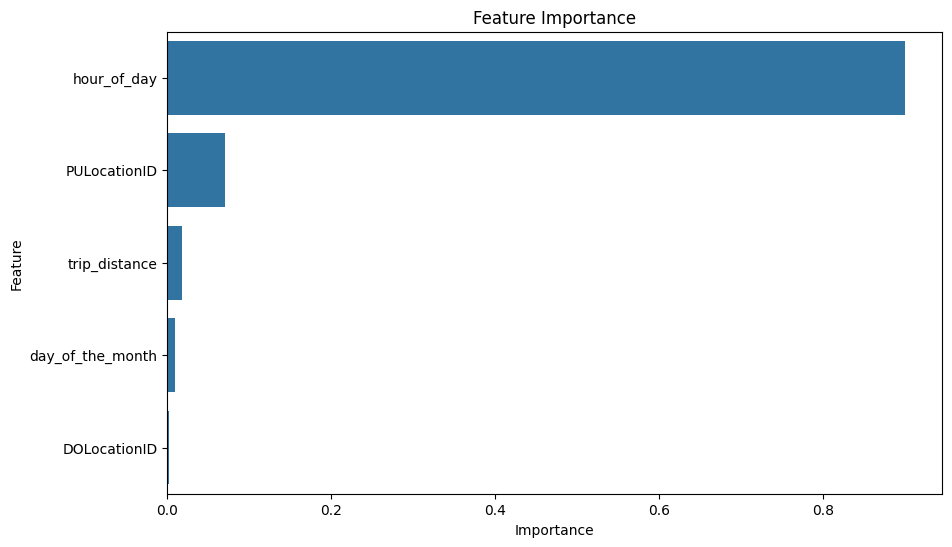

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract feature importance from the trained model
feature_importance = model.featureImportances.toArray()
feature_names = ["hour_of_day", "day_of_the_month", "trip_distance", "PULocationID", "DOLocationID"]

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance')
plt.show()
